## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 

### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

In [1]:
import math
import numpy as np
import sympy as sp
from tabulate import tabulate
import matplotlib.pyplot as plt


def get_table(min, max, number_of_points, func, func_name):
    step = (max - min) / number_of_points
    table = []
    x_values = []
    y_values = []
    for i in np.arange(min, max + step, step):
        table.append([i, func(i)])
        x_values.append(i)
        y_values.append(func(i))
    return x_values, y_values, tabulate(table, headers=["x", func_name],
                                        tablefmt="grid", floatfmt=".10f")


def draw_diagram(min, max, number_of_points, fun1, fun2, fun_name, rel_errors, abs_errors, degree):
    x_axis = []
    f1_values = []
    f2_values = []
    step = (max - min) / number_of_points
    for x in np.arange(min, max+step, step):
        x_axis.append(x)
        f1_values.append(fun1(x))
        f2_values.append(fun2(x))
        if fun1(x) == 0:
            rel_errors.append(abs(fun2(x) - fun1(x)))
        else:
            rel_errors.append(abs(fun2(x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(fun2(x) - fun1(x)))

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="Approximation of " + fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Least squares polynomial approximation of " + fun_name + ", degree: " + str(degree))
    plt.legend()
    plt.show()


def least_square_polynomial_approximation_calculations(x_array, y_array, m):
    n = len(x_array)
    g_array = [0] * (2 * m + 1)

    for i in range(2 * m + 1):
        sum = 0
        for j in range(n):
            sum += pow(x_array[j], i)
        g_array[i] = sum

    b_array = np.zeros(m + 1)

    for i in range(m + 1):
        sum = 0
        for j in range(n):
            sum += (pow(x_array[j], i) * y_array[j])
        b_array[i] = sum

    g_matrix = np.zeros((m + 1, m + 1))

    for i in range(m + 1):
        for j in range(m + 1):
            g_matrix[i][j] = g_array[i + j]

    a_array = np.linalg.solve(g_matrix, b_array)

    polynomial = 0
    X = sp.symbols('x')
    for i in range(m + 1):
        polynomial += pow(X, i) * a_array[i]

    return sp.simplify(polynomial)


def calculate(p, x):
    s = sp.symbols("x")
    return p.evalf(subs={s: x})


def cmp_err(rel_errors, abs_errors):
    tab = [["Mean of relative errors [%]", float(sum(rel_errors) / len(rel_errors)) * 100],
               ["Mean of absolute errors", float(sum(abs_errors) / len(abs_errors))]]
    print(tabulate(tab, headers=["Type", "General error"], tablefmt="grid", floatfmt=".10f"), "\n")


def least_square_polynomial_approximation(min, max, number_of_points, n):
    sqrt_x_arr, sqrt_y_arr, sqrt_x_y = get_table(min, max, number_of_points, math.sqrt, "sqrt(x)")
    sin_x_arr, sin_y_arr, sin_x_y = get_table(min, max, number_of_points, math.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    f_x_arr, f_y_arr, f_x_y = get_table(min, max, number_of_points, f, "x^3 + 2x")

    for i in range(1, n + 1):
        sqrt_lspa = least_square_polynomial_approximation_calculations(sqrt_x_arr, sqrt_y_arr, i)
        sin_lspa = least_square_polynomial_approximation_calculations(sin_x_arr, sin_y_arr, i)
        f_lspa = least_square_polynomial_approximation_calculations(f_x_arr, f_y_arr, i)

        sqrt_approx = lambda x: calculate(sqrt_lspa, x)
        sin_approx = lambda x: calculate(sin_lspa, x)
        f_approx = lambda x: calculate(f_lspa, x)

        rel_errors = []
        abs_errors = []
        draw_diagram(min, max, 100, math.sqrt, sqrt_approx, "sqrt(x)", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

        rel_errors = []
        abs_errors = []
        draw_diagram(min, max, 100, math.sin, sin_approx, "sin(x)", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

        rel_errors = []
        abs_errors = []
        draw_diagram(min, max, 100, f, f_approx, "x^3 + 2x", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

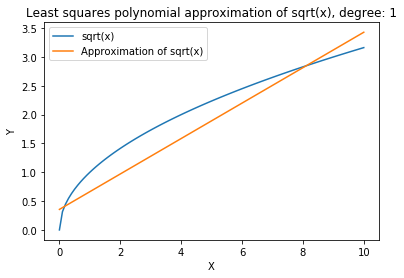

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   16.1621157445 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2698747206 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   61.1023830777 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6313403390 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 1976.8470640151 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  126.159491749

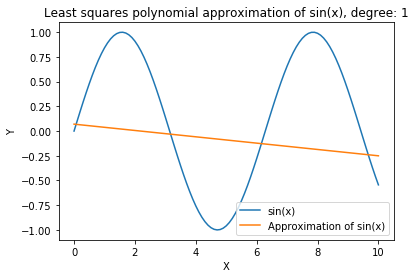

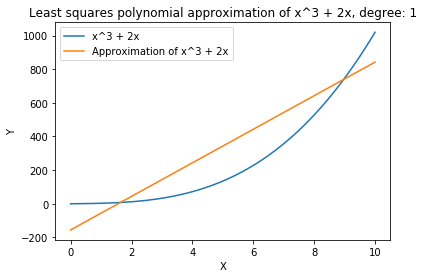

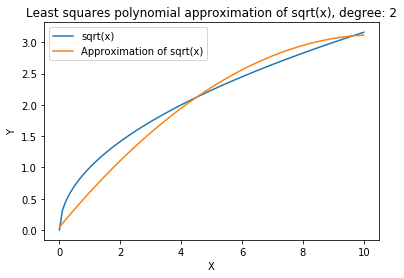

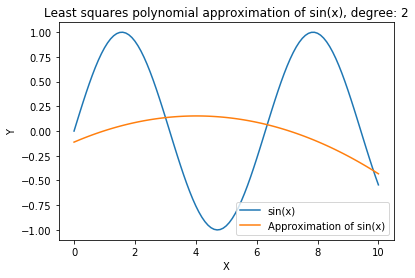

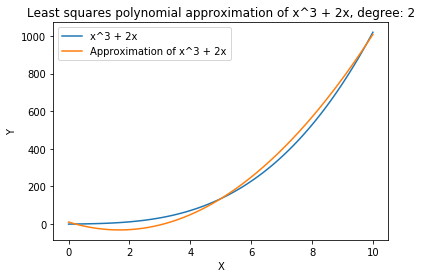

In [2]:
least_square_polynomial_approximation(0,10,3,2)

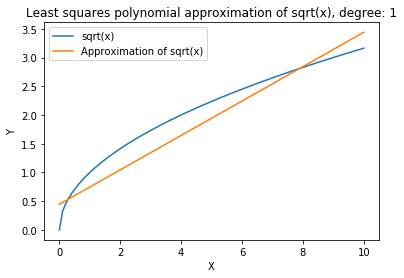

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   13.7181370448 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2311885603 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   31.9051244762 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6052065878 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2171.5439198084 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  116.842217821

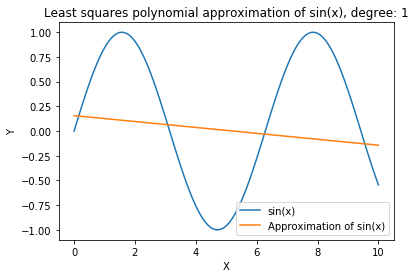

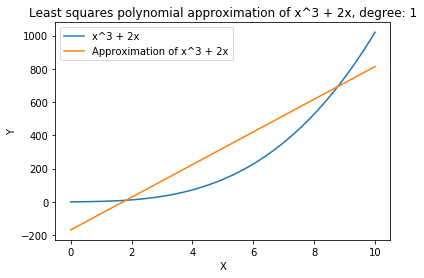

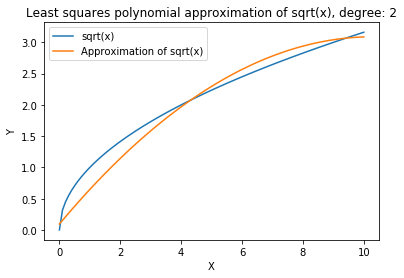

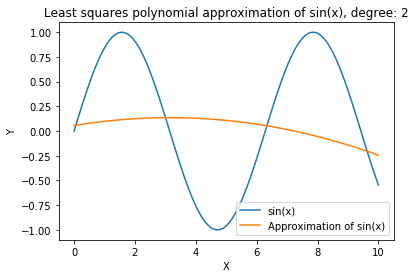

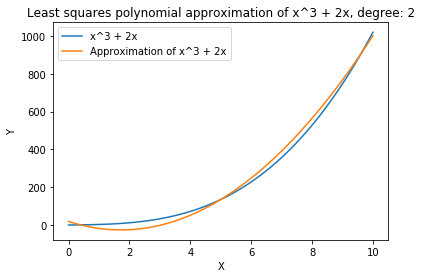

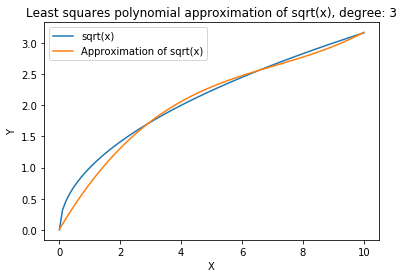

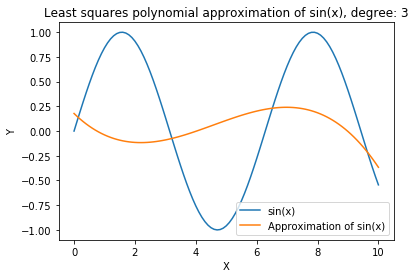

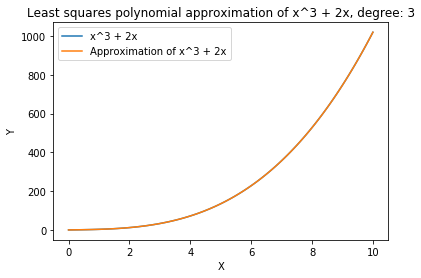

In [3]:
least_square_polynomial_approximation(0,10,4,3)

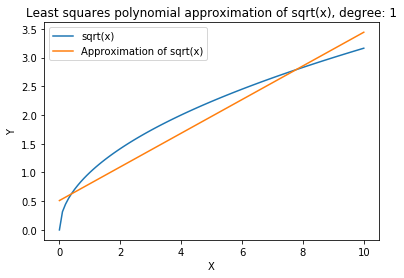

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   12.3628285583 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2069361012 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   18.8785629632 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5947249745 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2282.0061653995 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  111.995821782

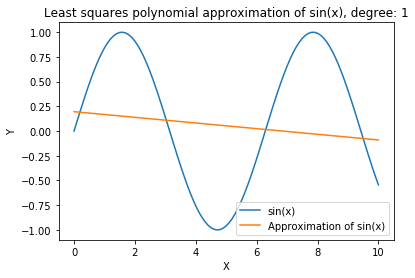

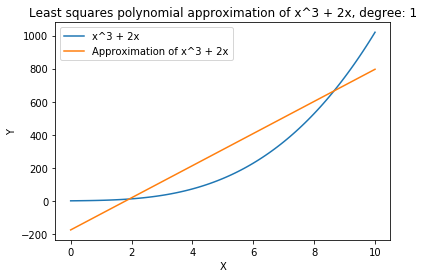

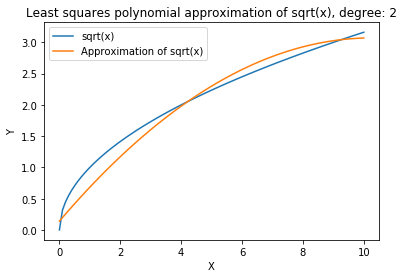

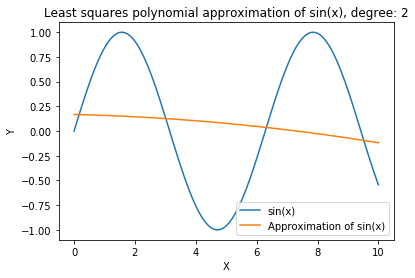

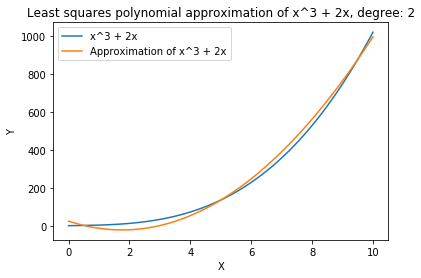

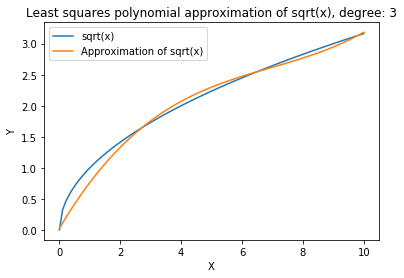

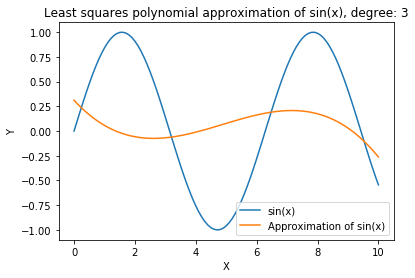

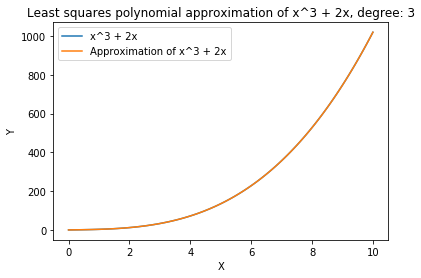

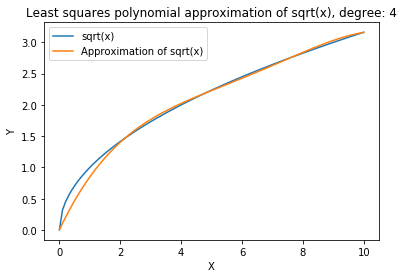

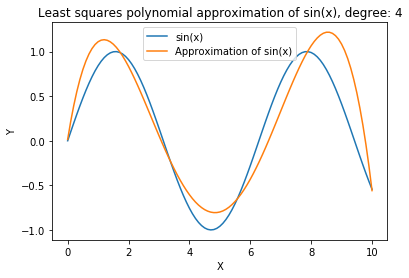

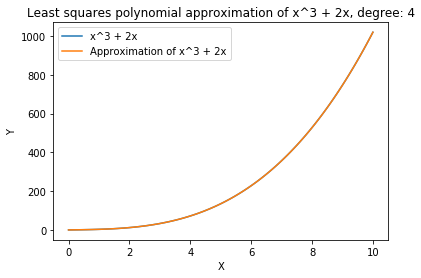

In [4]:
least_square_polynomial_approximation(0,10,5,4)

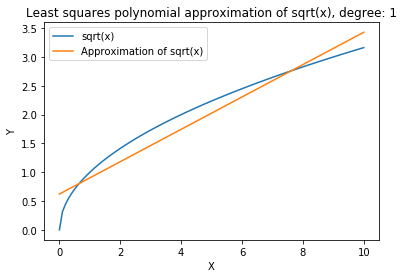

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   10.6965218139 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1702491452 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    8.1023029953 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5853678790 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2437.5984813932 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  105.788613861

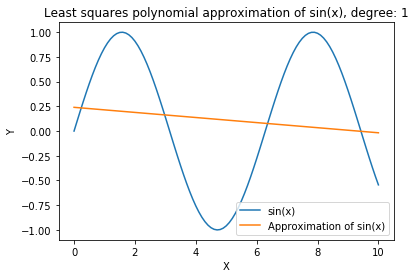

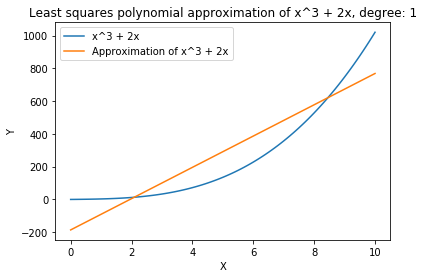

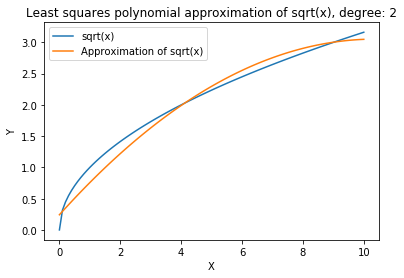

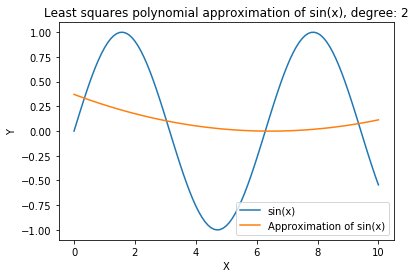

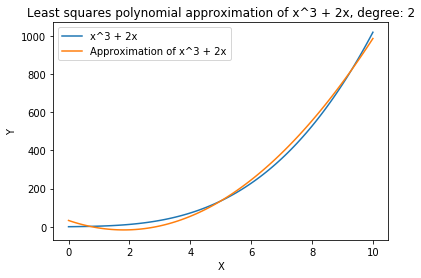

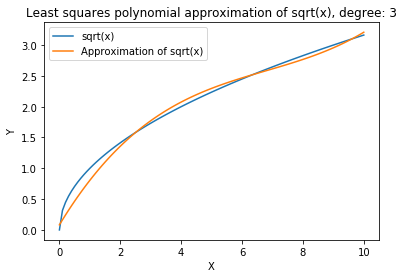

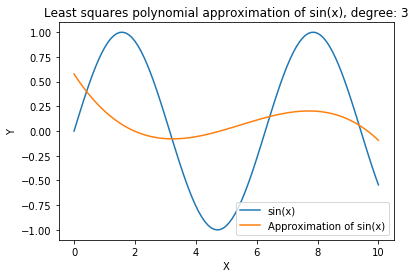

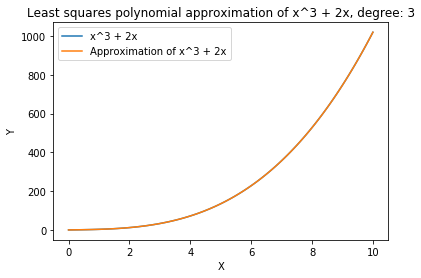

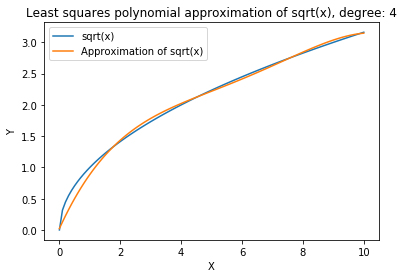

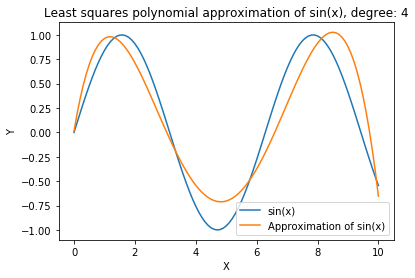

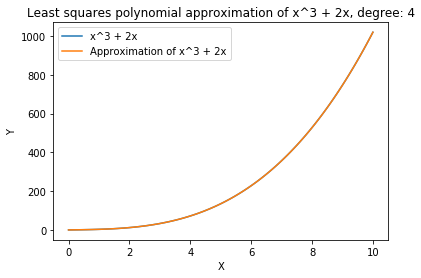

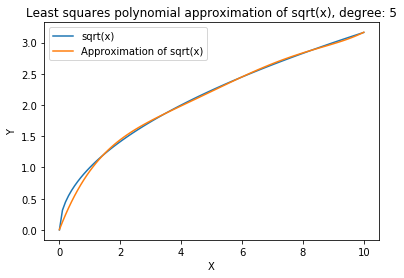

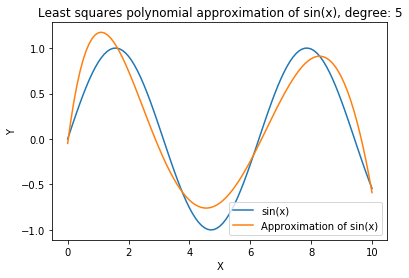

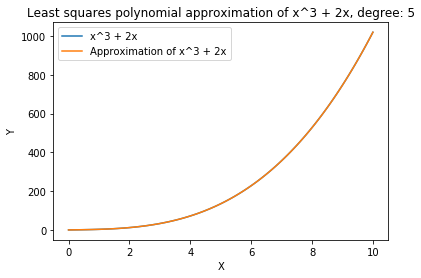

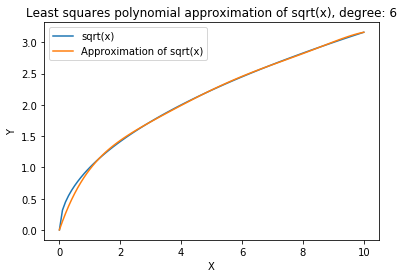

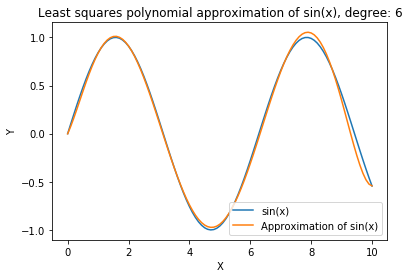

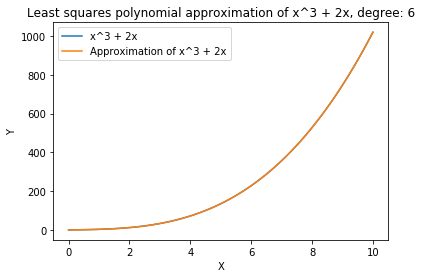

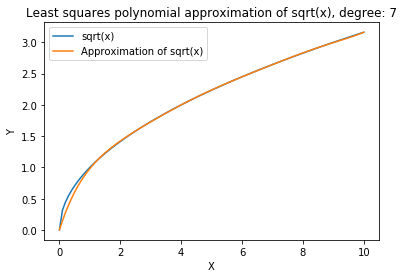

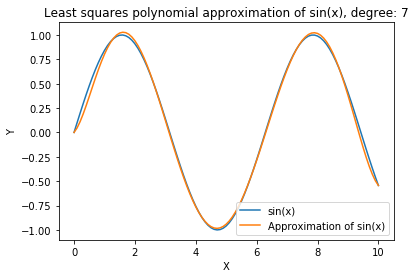

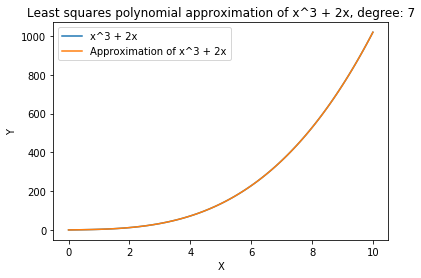

In [5]:
least_square_polynomial_approximation(0,10,8,7)

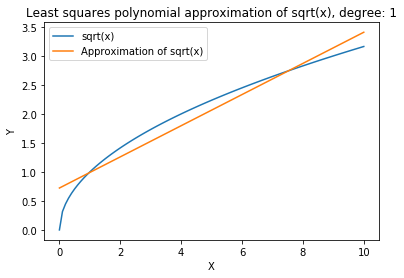

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    9.9139574367 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.1434957678 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |    3.0528081124 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5804563441 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2549.8689838845 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  101.917821782

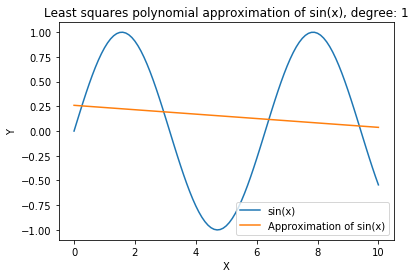

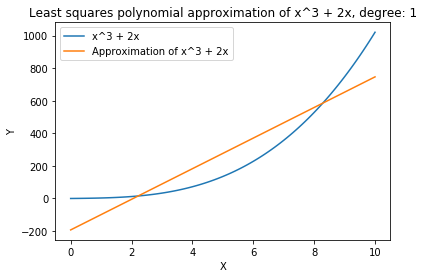

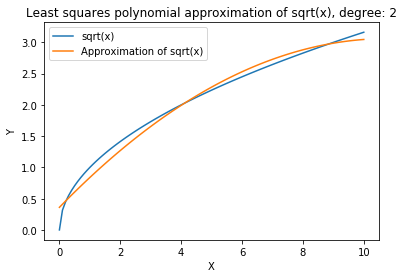

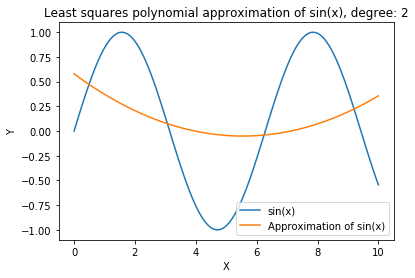

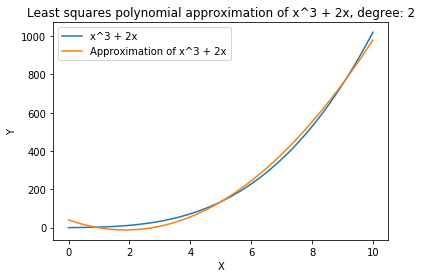

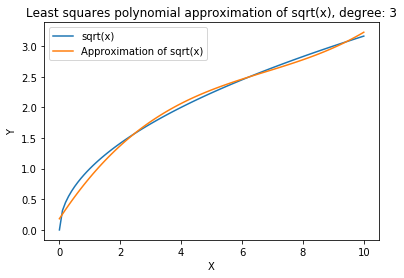

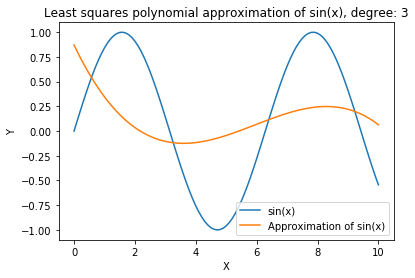

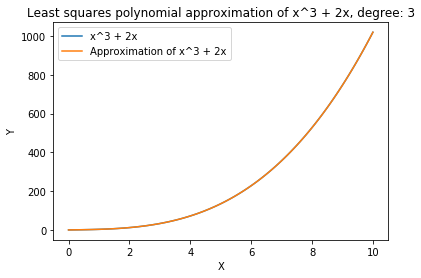

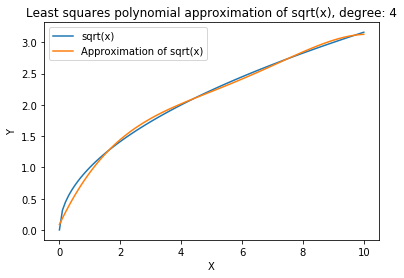

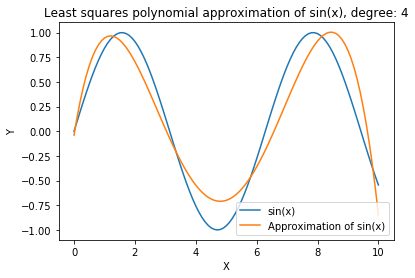

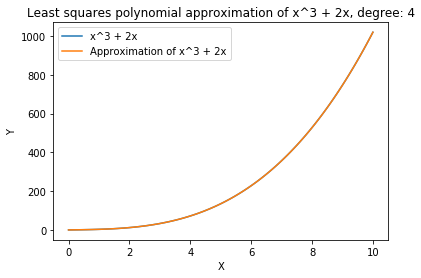

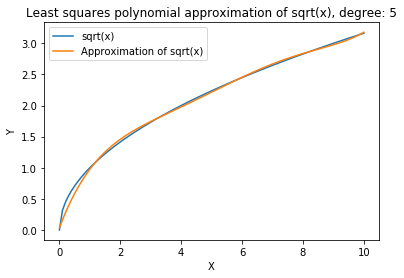

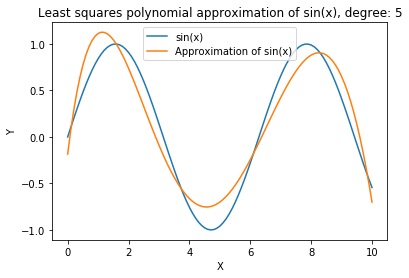

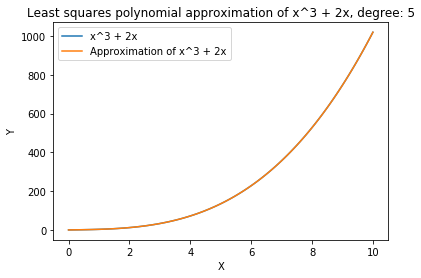

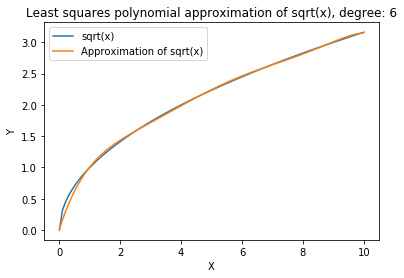

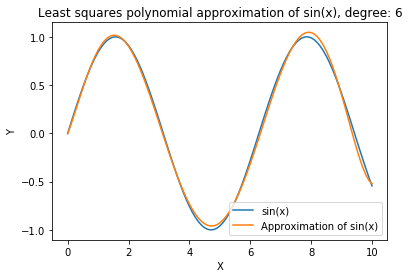

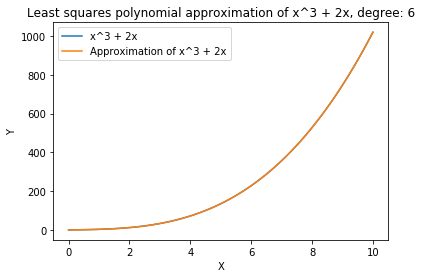

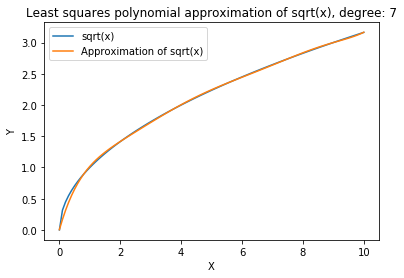

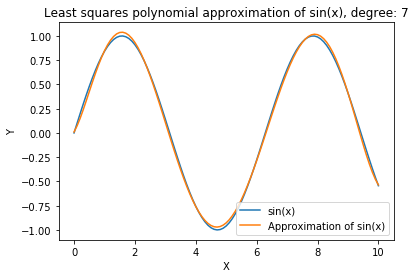

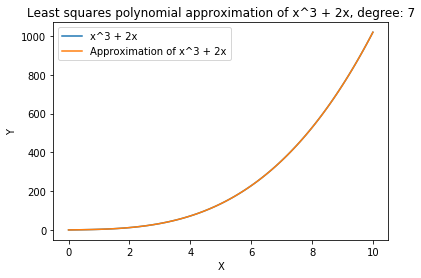

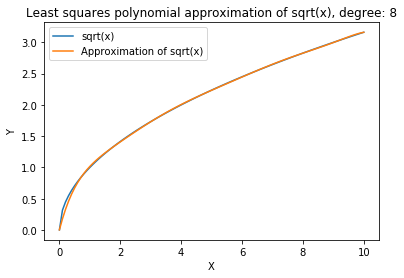

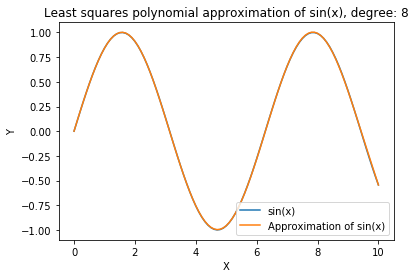

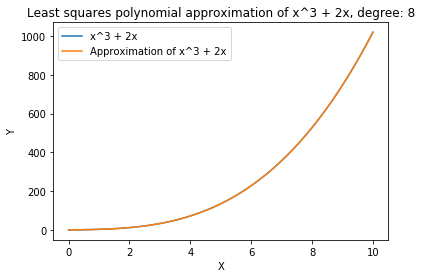

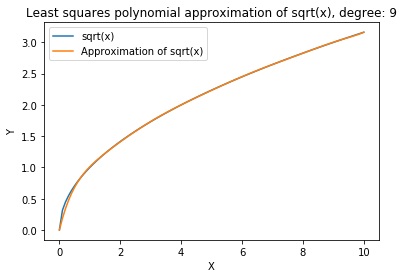

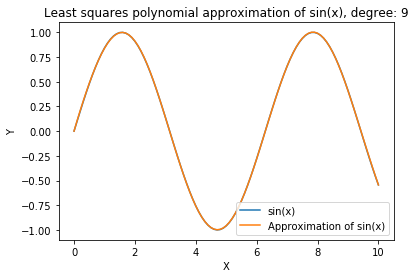

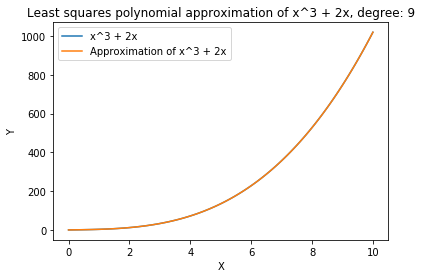

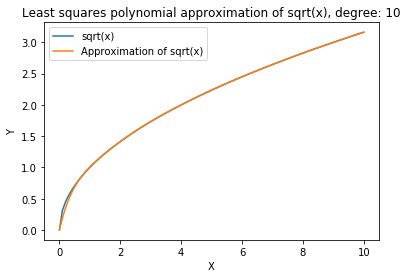

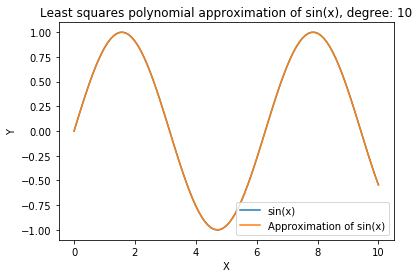

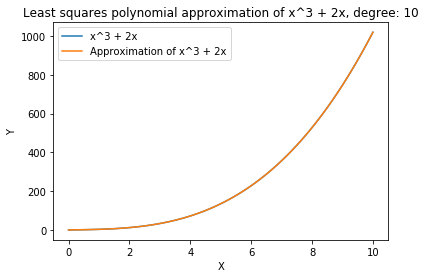

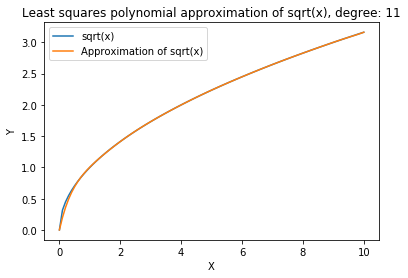

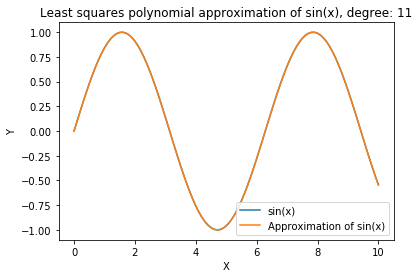

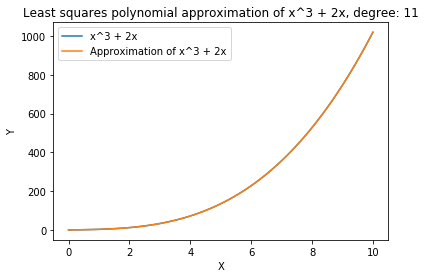

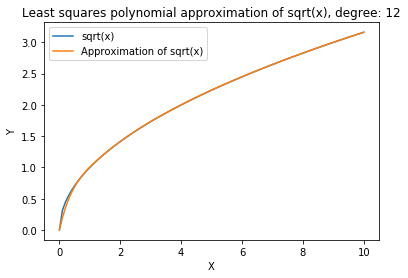

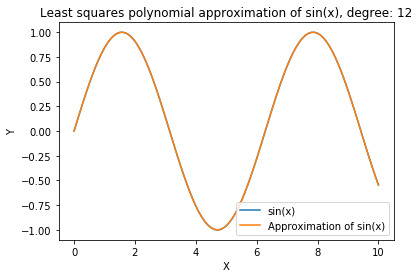

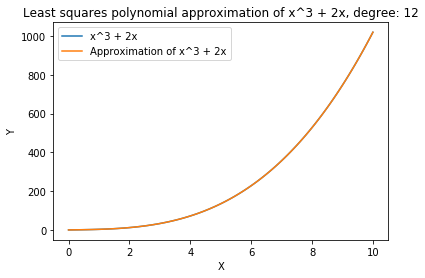

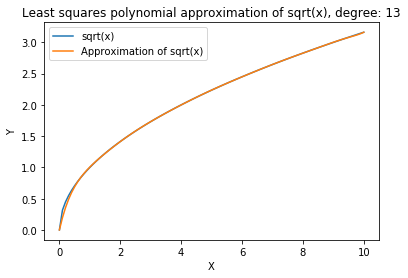

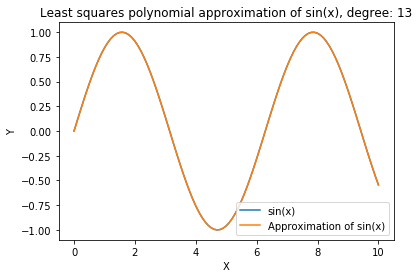

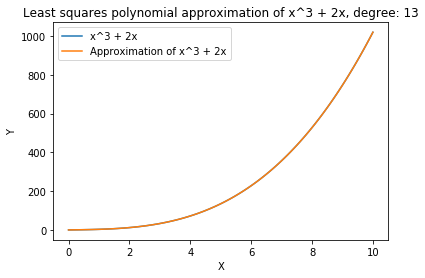

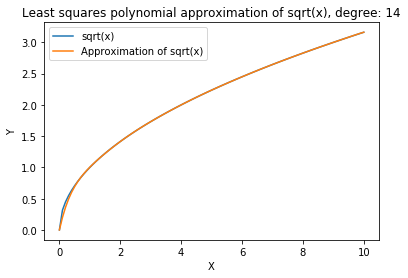

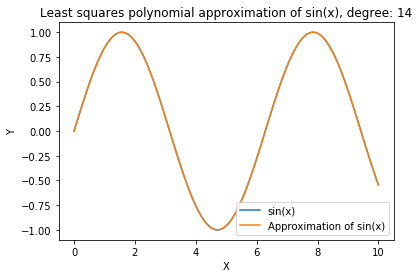

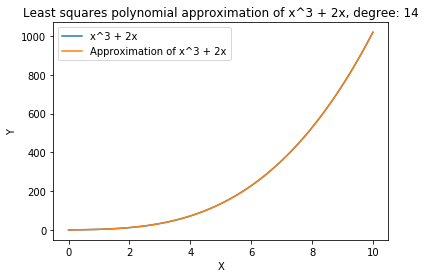

In [6]:
least_square_polynomial_approximation(0,10,15,14)

##### Zadanie 1a (dla chętnych)
Proszę zwrócić uwagę na dane wygenerowane przez funkcję trygonometryczną i wynik ich aproksymacji. Proszę spróbować zastosować aproksymację środniokwadratową funkcjami trygonometrycznymi. 




### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 

In [7]:
dates = ["3/2/20","3/3/20","3/4/20","3/5/20","3/6/20","3/7/20","3/8/20","3/9/20","3/10/20","3/11/20",
         "3/12/20","3/13/20", "3/14/20","3/15/20","3/16/20","3/17/20","3/18/20","3/19/20","3/20/20","3/21/20",
         "3/22/20","3/23/20","3/24/20","3/25/20","3/26/20","3/27/20","3/28/20","3/29/20","3/30/20", "3/31/20",
         "4/1/20","4/2/20", "4/3/20","4/4/20","4/5/20","4/6/20","4/7/20"
         ]
infected = [100,124,158,221,319,435,541,704,994,1301,
            1630,2183,2770,3613,4596,6344,9197,13779,19367,24192,
            33592,43781,54856,68211,85435,104126,123578,143491,163788,188530,
            215003,244877,277161,311357,336673,367004,400335
            ]
def compare_results(domain, values_original, values_approx, function_name, relative_error, absolute_error):

    for i in range(len(domain)):
      absolute_error.append(abs(values_original[i] - values_approx[i]))
      if values_original[i] == 0:
        relative_error.append(np.nan)
      else:
        relative_error.append(absolute_error[i] / values_original[i])
    print(tabulate({"x": domain, function_name: values_original, function_name + " interpolation": values_approx, 
                  "realtive error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")
    
def covid_approx_numpy(dates, infected, m):
  approx = np.polyfit(np.linspace(1, len(dates), len(dates)), infected, m)
  approx_values = np.polyval(approx, np.linspace(1, len(dates), len(dates)))
  relative_error = []
  absolute_error = []
  compare_results(dates, infected, approx_values, "infections", relative_error, absolute_error)

  plt.title(f'Least Square Polynomial Approximation degree of {m}')
  plt.plot(dates, approx_values, 'ro', label="Approximation", )
  plt.plot(dates, infected, label="Number of infections in USA")
  plt.grid(True, which='both')
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()

x          infections    infections interpolation    realtive error     absolute error
-------  ------------  --------------------------  ----------------  -----------------
3/2/20            100           -86897.6600284495    869.9766002845   86997.6600284495
3/3/20            124           -77183.5768136557    623.4482001101   77307.5768136557
3/4/20            158           -67469.4935988620    428.0221113852   67627.4935988620
3/5/20            221           -57755.4103840683    262.3366985704   57976.4103840683
3/6/20            319           -48041.3271692745    151.5997716905   48360.3271692745
3/7/20            435           -38327.2439544808     89.1086067919   38762.2439544808
3/8/20            541           -28613.1607396870     53.8893913857   29154.1607396870
3/9/20            704           -18899.0775248933     27.8452805751   19603.0775248933
3/10/20           994            -9184.9943100996     10.2404369317   10178.9943100996
3/11/20          1301              529.0889

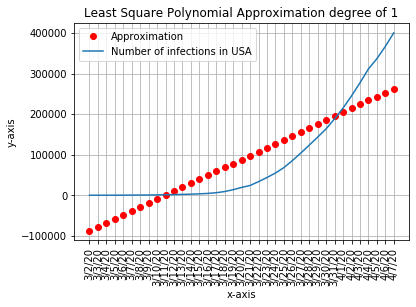

In [8]:
covid_approx_numpy(dates, infected, 1)

x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100            32900.8523908525    328.0085239085  32800.8523908525
3/3/20            124            22648.5168690959    181.6493295895  22524.5168690959
3/4/20            158            13537.1195608564     84.6779719042  13379.1195608564
3/5/20            221             5566.6604661342     24.1885088965   5345.6604661342
3/6/20            319            -1262.8604150709      4.9588100786   1581.8604150709
3/7/20            435            -6951.4430827588     16.9803289259   7386.4430827588
3/8/20            541           -11499.0875369296     22.2552449851  12040.0875369296
3/9/20            704           -14905.7937775832     22.1730025250  15609.7937775832
3/10/20           994           -17171.5618047197     18.2752130832  18165.5618047197
3/11/20          1301           -18296.3916183390     

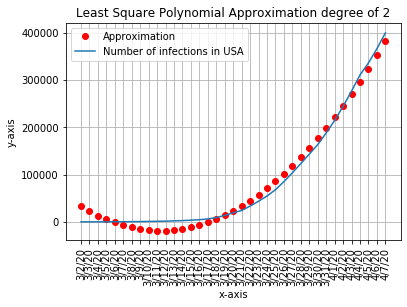

In [9]:
covid_approx_numpy(dates, infected, 2)

x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100             2458.9595688807     23.5895956888   2358.9595688807
3/3/20            124             2353.9216544480     17.9832391488   2229.9216544480
3/4/20            158             1940.2080096291     11.2797975293   1782.2080096291
3/5/20            221             1303.0900428888      4.8963350357   1082.0900428888
3/6/20            319              527.8391626921      0.6546682216    208.8391626921
3/7/20            435             -300.2732224962      1.6902832701    735.2732224962
3/8/20            541            -1095.9757042111      3.0258330947   1636.9757042111
3/9/20            704            -1773.9968739877      3.5198819233   2477.9968739877
3/10/20           994            -2249.0653233611      3.2626411704   3243.0653233611
3/11/20          1301            -2435.9096438664     

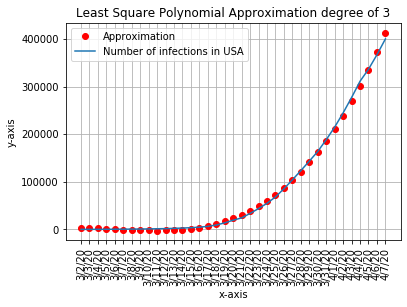

In [10]:
covid_approx_numpy(dates, infected, 3)

x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100            -5167.1303312793     52.6713033128   5267.1303312793
3/3/20            124            -1035.4516345120      9.3504164074   1159.4516345120
3/4/20            158             1698.1099175605      9.7475311238   1540.1099175605
3/5/20            221             3268.3569079160     13.7889452847   3047.3569079160
3/6/20            319             3901.0294241074     11.2289323640   3582.0294241074
3/7/20            435             3812.8050582624      7.7650690995   3377.8050582624
3/8/20            541             3211.2989070839      4.9358574992   2670.2989070839
3/9/20            704             2295.0635718495      2.2600334827   1591.0635718495
3/10/20           994             1253.5891584119      0.2611560950    259.5891584119
3/11/20          1301              267.3032771989     

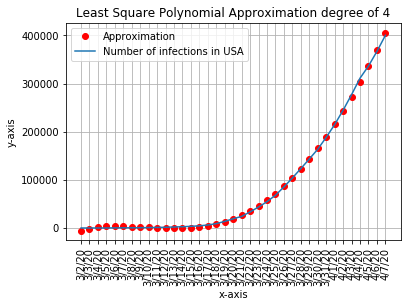

In [11]:
covid_approx_numpy(dates, infected, 4)

x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100              325.1514175373      2.2515141754    225.1514175373
3/3/20            124             -120.0713430427      1.9683172826    244.0713430427
3/4/20            158             -132.6506653786      1.8395611733    290.6506653786
3/5/20            221               91.4488375218      0.5862043551    129.5511624782
3/6/20            319              405.9410384966      0.2725424404     86.9410384966
3/7/20            435              710.5469848998      0.6334413446    275.5469848998
3/8/20            541              947.3235872729      0.7510602353    406.3235872729
3/9/20            704             1096.9923080143      0.5582277102    392.9923080143
3/10/20           994             1175.2678500507      0.1823620222    181.2678500507
3/11/20          1301             1229.1868455076     

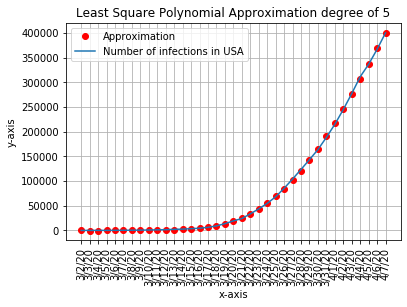

In [12]:
covid_approx_numpy(dates, infected, 5)

x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100              364.5473723201      2.6454737232    264.5473723201
3/3/20            124             -126.6373355051      2.0212688347    250.6373355051
3/4/20            158             -158.9146352320      2.0057888306    316.9146352320
3/5/20            221               62.4812237126      0.7172795307    158.5187762874
3/6/20            319              384.1012132972      0.2040790385     65.1012132972
3/7/20            435              700.3205394185      0.6099322745    265.3205394185
3/8/20            541              949.3963432169      0.7548915771    408.3963432169
3/9/20            704             1109.5440911748      0.5760569477    405.5440911748
3/10/20           994             1195.0326539989      0.2022461308    201.0326539989
3/11/20          1301             1252.2980742848     

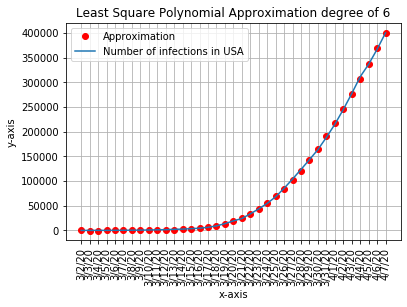

In [13]:
covid_approx_numpy(dates, infected, 6)

x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100              176.8555588636      0.7685555886     76.8555588636
3/3/20            124             -192.8836892398      2.5555136229    316.8836892398
3/4/20            158              459.7513131126      1.9098184374    301.7513131126
3/5/20            221              436.8157641191      0.9765419191    215.8157641191
3/6/20            319              152.5706584147      0.5217220739    166.4293415853
3/7/20            435              111.8420576900      0.7428918214    323.1579423100
3/8/20            541              417.5427218324      0.2282019929    123.4572781676
3/9/20            704              886.7149781511      0.2595383212    182.7149781511
3/10/20           994             1293.2106675020      0.3010167681    299.2106675020
3/11/20          1301             1532.6215179544     

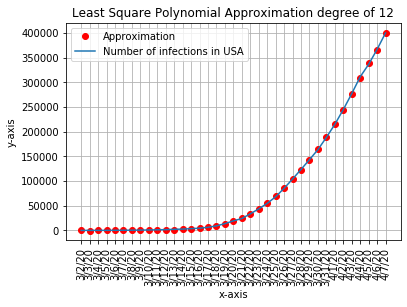

In [14]:
covid_approx_numpy(dates, infected, 12)

x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100               95.9206988718      0.0407930113      4.0793011282
3/3/20            124              158.2510417212      0.2762180784     34.2510417212
3/4/20            158               34.2201715502      0.7834166358    123.7798284498
3/5/20            221              428.8057796493      0.9402976455    207.8057796493
3/6/20            319              218.7275394523      0.3143337321    100.2724605477
3/7/20            435              292.3814738329      0.3278586808    142.6185261671
3/8/20            541              651.8058530548      0.2048167339    110.8058530548
3/9/20            704              861.5359460086      0.2237726506    157.5359460086
3/10/20           994              914.4590849476      0.0800210413     79.5409150524
3/11/20          1301             1125.6443730552     

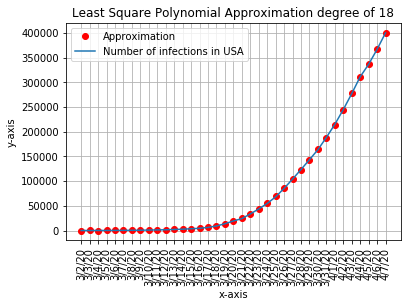

In [15]:
covid_approx_numpy(dates, infected, 18)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


x          infections    infections interpolation    realtive error    absolute error
-------  ------------  --------------------------  ----------------  ----------------
3/2/20            100               98.5772402461      0.0142275975      1.4227597539
3/3/20            124              140.9116253376      0.1363840753     16.9116253376
3/4/20            158               86.9338463295      0.4497857827     71.0661536705
3/5/20            221              372.0670098263      0.6835611304    151.0670098263
3/6/20            319              181.5046209689      0.4310199970    137.4953790311
3/7/20            435              395.2792372028      0.0913120984     39.7207627972
3/8/20            541              689.5973398273      0.2746716078    148.5973398273
3/9/20            704              738.8829378471      0.0495496276     34.8829378471
3/10/20           994              826.1444623770      0.1688687501    167.8555376230
3/11/20          1301             1229.3932525530     

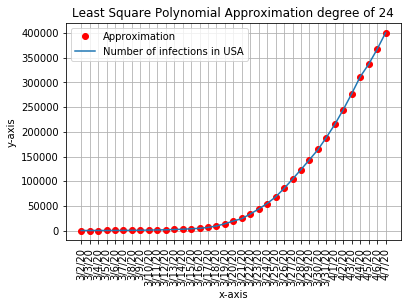

In [16]:
covid_approx_numpy(dates, infected, 24)

